In [14]:
# 获得数据
#了解数据每一项的含义
# 缺失数据怎么处理
# 文本到数字的映射
# 分片训练集和测试集
# 属性统一尺度
# 选择重要的属性
# 通过随机森林选择属性

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [31]:
# 获得原始数据
df = pd.read_csv('d:/project/data/block_min.txt', delimiter='\t')
df.head()

,site,qt,uptime,wrapperid,price,baseprice,addprice,tax,uname,pinfo,...,deptime,fromdate,retdate,rprice,rbaseprice,rtax,coreblockdesc,qunarglobal,biddingcase,pricekey
0,cpb.trade.qunar.com,9eb9c41b6a31A,2017-9-26 00:00:00,ttsgjd10132,3010.0,3000,10,20,NaN,21#0,...,09:15,2017-12-20,NaN,3010.0,3010.0,20.0,NaN,NaN,NaN,XCJUCJJ2017-12-20#200#ITTS#cpb.trade.qunar.com...
1,cpb.trade.qunar.com,9fb9c41c8a94A,2017-9-26 00:00:00,ttsgjd10132,3046.0,3000,46,20,NaN,21#0,...,09:15,2017-12-20,NaN,3046.0,3046.0,20.0,NaN,NaN,NaN,XCJUCJJ2017-12-20#200#ITTS#cpb.trade.qunar.com...
2,mzi.trade.qunar.com,m_b8b588b36e07440582825f1ece4bf0dc,2017-9-26 00:00:00,ttsgjs00198,3290.0,3570,21,3559,yyfczpx1195,"70#290#TEK_855717320_QLXCPCN1_3RTN,TEK_8557173...",...,00:05/10:05~16:20/02:50,2017-10-17,2017-10-25,3290.0,3570.0,3559.0,NaN,NaN,NaN,XSHAMRU2017-10-17~MRUSHA2017-10-25#200#ITTS#mz...
3,qlh.th.qunar.com,m_2bd5bf0cd59f4c20b90268a8ebb48e17,2017-9-26 00:00:00,ttsgjdt2409,19.0,60,-8,427,YMSH,70#330#TSC_847989843_UOW16T_5OWN@ETERM@QFARE,...,01:00,2017-10-09,NaN,19.0,60.0,427.0,NaN,NaN,NaN,"XKMGBKK2017-10-09#200#ITTS#qlh.th.qunar.com#{""..."
4,yyi.trade.qunar.com,m_bbe3936877854ce18711587e422cce94,2017-9-26 00:00:01,ttsgjs00054,922.0,900,152,1960,nfzm1545,"70#92954#T3U_26300919185492233_VL1MCL_20RTN,T3...",...,10:20/19:20~00:55/15:30,2017-10-17,2017-10-25,922.0,900.0,1960.0,NaN,NaN,NaN,XSZXLAX2017-10-17~LAXSZX2017-10-25#200#ITTS#yy...


In [8]:
df.columns

Index(['site', 'qt', 'uptime', 'wrapperid', 'price', 'baseprice', 'addprice',
       'tax', 'uname', 'pinfo', 'pricetag', 'flighttype', 'ispackage',
       'source', 'fromcity', 'tocity', 'flightnum', 'cabin', 'depdate',
       'deptime', 'fromdate', 'retdate', 'rprice', 'rbaseprice', 'rtax',
       'coreblockdesc', 'qunarglobal', 'biddingcase', 'pricekey'],
      dtype='object')

In [32]:
# 计算变价
df['price_change'] = df['price'] - df['rprice']
df['tax_change'] = df['tax'] - df['rtax']

In [33]:
# 打标记，0成功，1失败
df['ok'] = 0
df.loc[df['coreblockdesc'].notnull(), 'ok'] = 1

In [34]:
df[df['ok']==1].head()

,site,qt,uptime,wrapperid,price,baseprice,addprice,tax,uname,pinfo,...,rprice,rbaseprice,rtax,coreblockdesc,qunarglobal,biddingcase,pricekey,price_change,tax_change,ok
10,bae.trade.qunar.com,m_d8abdfdbae1f49f58c36a9d69065261a,2017-9-26 00:00:02,ttsgjd11042,797.0,785,12,0,NaN,21#0,...,797.0,0.0,0.0,afare预定接口返回的基本信息校验不通过,NaN,NaN,XCTUJKT2017-10-09#200#ITTS#bae.trade.qunar.com...,0.0,0.0,1
12,cma.trade.qunar.com,m_8c5b251c1c354a95906520e0c40f13e0,2017-9-26 00:00:03,ttsgjd10092,135.0,144,-9,83,ijaiqdc2599,21#0,...,135.0,0.0,83.0,afare预定接口返回的基本信息校验不通过,NaN,NaN,XSGNDAD2017-10-03#200#ITTS#cma.trade.qunar.com...,0.0,0.0,1
21,bae.trade.qunar.com,m_8f8af7287a6a4338afafce6135abb541,2017-9-26 00:00:05,ttsgjd11042,797.0,785,12,0,NaN,21#0,...,797.0,0.0,0.0,afare预定接口返回的基本信息校验不通过,NaN,NaN,XCTUJKT2017-10-09#200#ITTS#bae.trade.qunar.com...,0.0,0.0,1
27,ytf.trade.qunar.com,9db9c4557166A,2017-9-26 00:00:07,ttsgjd10218,992.0,960,32,252,NaN,21#0,...,992.0,960.0,252.0,afare预定接口返回的基本信息校验不通过,192.168.31.108_749cae52_15eb9b37590_-2a42|1506...,NaN,XHKGPUS2017-10-03#200#ITTS#ytf.trade.qunar.com...,0.0,0.0,1
46,cpb.trade.qunar.com,m_20ae527189fa4bcabb57a177163fa961,2017-9-26 00:00:10,ttsgjd10132,429.0,420,9,129,plzt2584,21#0,...,429.0,0.0,129.0,afare预定接口返回的基本信息校验不通过,NaN,NaN,XMFMBKK2017-10-16#200#ITTS#cpb.trade.qunar.com...,0.0,0.0,1


In [35]:
# 提取航司
def get_carrier(key):
    k1 = key.split('~')
    ca = ''
    for i, v in enumerate(k1):
        if i>0:
            ca+='~'
        k2 = v.split('/')
        for j, m in enumerate(k2):
            if j > 0:
                ca+='/'
            ca += m[0:2]
    return ca

print(get_carrier('LJ201'))
print(get_carrier('EK303/EK703~EK702/EK302'))
print(get_carrier('EK703~EK702'))
print(get_carrier('3U8702/3U8699'))

LJ
EK/EK~EK/EK
EK~EK
3U/3U


In [36]:
df['carrier'] = df['flightnum'].apply(get_carrier)

In [37]:
# 提取政策类型
def split_pinfo(pinfo):
    return pinfo.split('#')[0]
df['pinfo']=df['pinfo'].apply(split_pinfo)

In [38]:
# 数字化
site_mapping = {label:idx for idx,label in enumerate(np.unique(df['site']))}
pinfo_mapping = {label:idx for idx,label in enumerate(np.unique(df['pinfo']))}
fromcity_mapping = {label:idx for idx,label in enumerate(np.unique(df['fromcity']))}
tocity_mapping = {label:idx for idx,label in enumerate(np.unique(df['tocity']))}
flightnum_mapping = {label:idx for idx,label in enumerate(np.unique(df['flightnum']))}
cabin_mapping = {label:idx for idx,label in enumerate(np.unique(df['cabin']))}
carrier_mapping = {label:idx for idx,label in enumerate(np.unique(df['carrier']))}

site_le = LabelEncoder()
pinfo_le = LabelEncoder()
fromcity_le = LabelEncoder()
tocity_le = LabelEncoder()
flightnum_le = LabelEncoder()
cabin_le = LabelEncoder()
carrier_le = LabelEncoder()
boolean_le = LabelEncoder()
source_le = LabelEncoder()

df['site'] = site_le.fit_transform(df['site'].values)
df['pinfo'] = pinfo_le.fit_transform(df['pinfo'].values)
df['fromcity'] = fromcity_le.fit_transform(df['fromcity'].values)
df['tocity'] = tocity_le.fit_transform(df['tocity'].values)
df['carrier'] = carrier_le.fit_transform(df['carrier'].values)
df['cabin'] = cabin_le.fit_transform(df['cabin'].values)
df['flightnum'] = flightnum_le.fit_transform(df['flightnum'].values)
df['ispackage'] = boolean_le.fit_transform(df['ispackage'].values)
df['source'] = source_le.fit_transform(df['source'].values)

df.head()

,site,qt,uptime,wrapperid,price,baseprice,addprice,tax,uname,pinfo,...,rbaseprice,rtax,coreblockdesc,qunarglobal,biddingcase,pricekey,price_change,tax_change,ok,carrier
0,9,9eb9c41b6a31A,2017-9-26 00:00:00,ttsgjd10132,3010.0,3000,10,20,NaN,4,...,3010.0,20.0,NaN,NaN,NaN,XCJUCJJ2017-12-20#200#ITTS#cpb.trade.qunar.com...,0.0,0.0,0,279
1,9,9fb9c41c8a94A,2017-9-26 00:00:00,ttsgjd10132,3046.0,3000,46,20,NaN,4,...,3046.0,20.0,NaN,NaN,NaN,XCJUCJJ2017-12-20#200#ITTS#cpb.trade.qunar.com...,0.0,0.0,0,279
2,58,m_b8b588b36e07440582825f1ece4bf0dc,2017-9-26 00:00:00,ttsgjs00198,3290.0,3570,21,3559,yyfczpx1195,5,...,3570.0,3559.0,NaN,NaN,NaN,XSHAMRU2017-10-17~MRUSHA2017-10-25#200#ITTS#mz...,0.0,0.0,0,137
3,65,m_2bd5bf0cd59f4c20b90268a8ebb48e17,2017-9-26 00:00:00,ttsgjdt2409,19.0,60,-8,427,YMSH,5,...,60.0,427.0,NaN,NaN,NaN,"XKMGBKK2017-10-09#200#ITTS#qlh.th.qunar.com#{""...",0.0,0.0,0,389
4,136,m_bbe3936877854ce18711587e422cce94,2017-9-26 00:00:01,ttsgjs00054,922.0,900,152,1960,nfzm1545,5,...,900.0,1960.0,NaN,NaN,NaN,XSZXLAX2017-10-17~LAXSZX2017-10-25#200#ITTS#yy...,0.0,0.0,0,5


In [12]:
df.columns

Index(['site', 'qt', 'uptime', 'wrapperid', 'price', 'baseprice', 'addprice',
       'tax', 'uname', 'pinfo', 'pricetag', 'flighttype', 'ispackage',
       'source', 'fromcity', 'tocity', 'flightnum', 'cabin', 'depdate',
       'deptime', 'fromdate', 'retdate', 'rprice', 'rbaseprice', 'rtax',
       'coreblockdesc', 'qunarglobal', 'biddingcase', 'pricekey',
       'price_change', 'tax_change', 'ok', 'carrier'],
      dtype='object')

In [106]:
# 提取共同属性
a = df[['ok', 'site','pinfo','flighttype','source','ispackage', 'fromcity', 'tocity', 'flightnum', 'cabin', 'carrier', 'price_change', 'tax_change']]

In [107]:
# 去除na值，落盘
a = a.fillna(value=0)
a.isnull().sum()
a.to_csv('d:/tmp/b.txt', encoding='utf8')

In [108]:
# 分组
from sklearn.cross_validation import train_test_split
X, y = a.iloc[:, 1:].values, a.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [109]:
# 归一化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [67]:
%matplotlib inline

In [112]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr.intercept_
lr.coef_

Training accuracy: 0.900271467352
Test accuracy: 0.9


array([[ 0.14828121,  0.52054732,  0.43371717, -0.20481304, -0.01207893,
         0.14220595,  0.08207198,  0.        , -0.07049165, -0.06928596,
        -0.60450259,  0.04169051]])

IndexError: too many indices for array

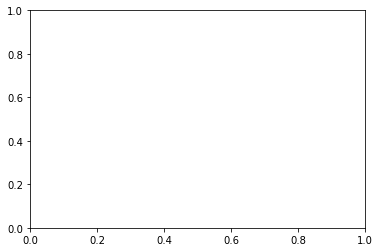

In [88]:
# L1 regularization
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue','gray', 'indigo']
weights, params = [], []
for c in np.arange(0, 6):
    lr = LogisticRegression(penalty='l1',C=10**c,random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0][1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[0]), colors):
    plt.plot(params, weights[:, column],label=a.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()

In [87]:
weights

array([ 0.562883  ,  0.57086854,  0.57169444,  0.57177686,  0.57178511,
        0.57178593])

In [89]:
# SBS sequential backward selection
# Sequential feature selection algorithms
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


In [113]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

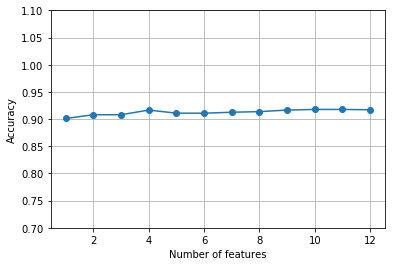

In [114]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [151]:
k5 = list(sbs.subsets_[8])
print(a.columns[1:][k5])

Index(['site', 'pinfo', 'tocity', 'carrier'], dtype='object')


In [129]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.958565509358
Test accuracy: 0.915666666667


In [152]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:',knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.952421774539
Test accuracy: 0.916666666667


In [96]:
# random forests
from sklearn.ensemble import RandomForestClassifier
feat_labels = a.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[f],importances[indices[f]]))

 1) site                           0.164467
 2) pinfo                          0.146746
 3) flighttype                     0.133827
 4) source                         0.121398
 5) ispackage                      0.117937
 6) fromcity                       0.113154
 7) tocity                         0.058768
 8) flightnum                      0.052362
 9) cabin                          0.046329
10) carrier                        0.033925
11) price_change                   0.005567
12) tax_change                     0.005518


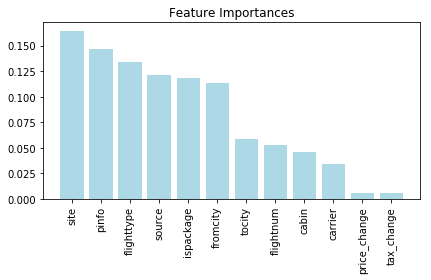

In [97]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [98]:
X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(6999, 1)

In [153]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = a.iloc[:, 1:].values, a.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [154]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 2.10839904  0.00315361  1.73900301  1.3645978   0.61788504  0.65285158
  0.69723265  0.80505719  1.07362707  1.01947924  0.96568957  0.95473898]


In [155]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [156]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.11026165 -0.24320662]
 [ 0.07908248 -0.22011209]
 [ 0.17641471 -0.34351924]
 [-0.24027762  0.34485009]
 [ 0.01232916  0.13367386]
 [ 0.29098602 -0.41553567]
 [ 0.16723689 -0.22862938]
 [-0.60049853 -0.3618475 ]
 [ 0.22281049 -0.34306589]
 [-0.60621758 -0.3522983 ]
 [-0.03532952  0.12640871]
 [-0.03080384  0.15473561]]


In [157]:
X_train_std[0].dot(w)

array([-1.32360773, -1.88358179])

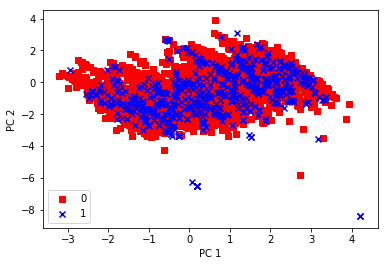

In [158]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()